# 🌿 주가 분석
## **가설 : 엔씨소프트 게임들의 검색량이 최대일 때 주가도 상승할 것이다.**
## #블레이드 앤 소울2 / #리니지 W / #트릭스터

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
stock_data = pd.read_csv('./sample_data/linege-stock-data.csv')
bs2_data = pd.read_csv('./sample_data/bs2.csv')
lineageW_data = pd.read_csv('./sample_data/lineageW.csv')
trickster_data = pd.read_csv('./sample_data/trickster.csv')



---


#1️⃣ 블레이드 앤 소울

In [ ]:
# bs2 데이터 : data, bs2 검색량
bs2_data.head()

,date,bs2
0,2021-03-21,2
1,2021-03-28,2
2,2021-04-04,3
3,2021-04-11,4
4,2021-04-18,19


In [ ]:
# 검색량이 최대인 index 가져오기
bs2_max = bs2_data['bs2'].argmax()    # 검색량이 최대인 date index
print(bs2_max)

22


In [ ]:
# 주가, bs2 검색량으로 새로운 DataFrame 만들기
bs2 = stock_data[bs2_max-2:bs2_max+3]                       # 주가
bs2_slice = bs2_data['bs2'][bs2_max-2:bs2_max+3].tolist()   # bs2 검색량
bs2 = bs2.assign(bs2 = bs2_slice)
print(bs2)

          date  num_search  stock_price  bs2
20  2021-08-08          31       790000    8
21  2021-08-15          35       853000    7
22  2021-08-22          38       709000  100
23  2021-08-29          34       633000   37
24  2021-09-05          30       611000   21


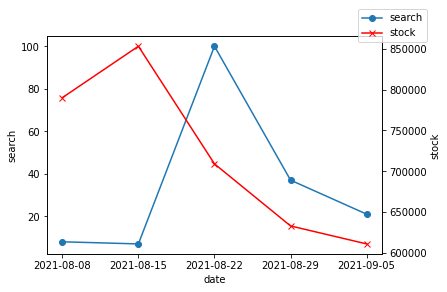

In [ ]:
# 주가, bs2 검색량 그래프 그리기
fig, ax1 = plt.subplots()
ax1.plot(bs2['date'], bs2['bs2'], marker='o', label='search')                      # bs2 검색량 그래프
plt.xlabel('date')
plt.ylabel('search')

ax2 = ax1.twinx()
ax2.plot(bs2['date'], bs2['stock_price'], marker='x', color='red', label='stock')  # 주가 그래프
plt.ylabel('stock')
fig.legend(loc="upper right", bbox_to_anchor=(1,1))
plt.show()

## → 검색량이 최대이지만, 주가가 감소한다. (가설 불일치)



---


#2️⃣ 리니지W

In [ ]:
# lineageW 데이터 : data, lineageW 검색량
lineageW_data

,date,lineageW
0,2021-03-21,0
1,2021-03-28,<1
2,2021-04-04,0
3,2021-04-11,0
4,2021-04-18,0
5,2021-04-25,0
6,2021-05-02,0
7,2021-05-09,0
8,2021-05-16,<1
9,2021-05-23,0


In [ ]:
# lineageW 데이터에서 '<1'을 '0'으로 치환
lineageW_data['lineageW'] = lineageW_data['lineageW'].str.replace(pat=r'<1', repl=r'0', regex=True)
lineageW_data['lineageW'] = lineageW_data['lineageW'].astype(str).astype(int)

In [ ]:
# 검색량이 최대인 index 가져오기
lin_max = lineageW_data['lineageW'].argmax()    # 검색량이 최대인 date index
print(lin_max)

32


In [ ]:
# 주가, lin 검색량으로 새로운 DataFrame 만들기
lin = stock_data[lin_max-2:lin_max+3]                                 # 주가
lin_slice = lineageW_data['lineageW'][lin_max-2:lin_max+3].tolist()   # lin 검색량
lin = lin.assign(lin = lin_slice)
print(lin)

          date  num_search  stock_price  lin
30  2021-10-17          30       619000    8
31  2021-10-24          33       621000    9
32  2021-10-31         100       595000  100
33  2021-11-07          79       786000   66
34  2021-11-14          70       760000   54


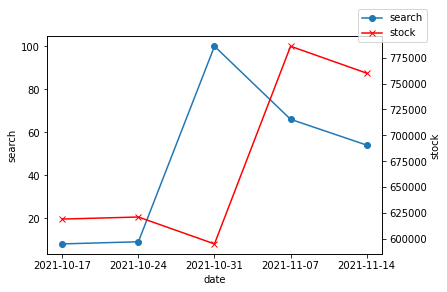

In [ ]:
# 주가, lin 검색량 그래프 그리기
fig, ax1 = plt.subplots()
ax1.plot(lin['date'], lin['lin'], marker='o', label='search')                       # lin 검색량 그래프
plt.xlabel('date')
plt.ylabel('search')

ax2 = ax1.twinx()
ax2.plot(lin['date'], lin['stock_price'], marker='x', color='red', label='stock')  # 주가 그래프
plt.ylabel('stock')
fig.legend(loc="upper right", bbox_to_anchor=(1,1))
plt.show()

## → 검색량이 최대인 이후로 주가가 상승한다. (가설 일치)



---


#3️⃣ 트릭스터

In [ ]:
# trick 데이터 : data, trick 검색량
trickster_data.head()

,date,trickster
0,2021-03-21,12
1,2021-03-28,7
2,2021-04-04,6
3,2021-04-11,4
4,2021-04-18,6


In [ ]:
# 검색량이 최대인 index 가져오기
trick_max = trickster_data['trickster'].argmax()    # 검색량이 최대인 date index
print(trick_max)

8


In [ ]:
# 주가, trick 검색량으로 새로운 DataFrame 만들기
trick = stock_data[trick_max-2:trick_max+3]                                 # 주가
trick_slice = trickster_data['trickster'][trick_max-2:trick_max+3].tolist() # trick 검색량
trick = trick.assign(trick = bs2_slice)
print(trick)

          date  num_search  stock_price  trick
6   2021-05-02          27       820000      8
7   2021-05-09          26       850000      7
8   2021-05-16          29       823000    100
9   2021-05-23          26       856000     37
10  2021-05-30          29       854000     21


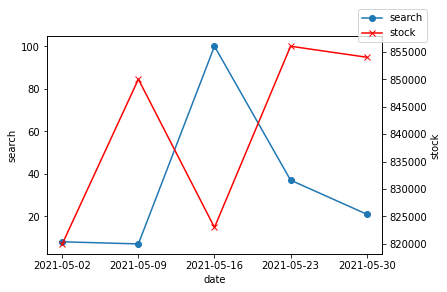

In [ ]:
# 주가, trick 검색량 그래프 그리기
fig, ax1 = plt.subplots()
ax1.plot(trick['date'], trick['trick'], marker='o', label='search')                     # trickster 검색량 그래프
plt.xlabel('date')
plt.ylabel('search')

ax2 = ax1.twinx()
ax2.plot(trick['date'], trick['stock_price'], marker='x', color='red', label='stock')  # 주가 그래프
plt.ylabel('stock')
fig.legend(loc="upper right", bbox_to_anchor=(1,1))
plt.show()

## → 검색량이 최대인 이후로 주가가 상승한다. (가설 일치)



---
###🌿결론
## 가설 : 엔씨소프트 게임들의 검색량이 최대일 때 주가도 상승할 것이다.
* 가설 일치 : 리니지W, 트릭스터 => 게임 출시
* 가설 불일치 : 블레이드 앤 소울2 => 과금 이슈